## <font color=blue>                                  Multiple Linear Regression

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [5]:
#checking of the null values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [6]:
#check the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


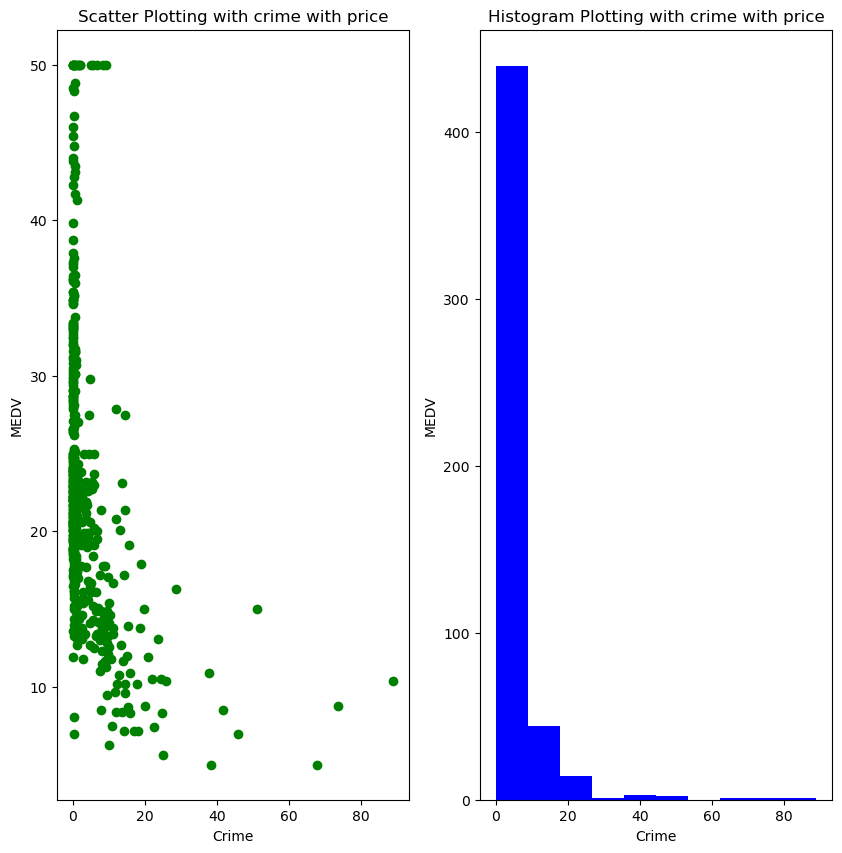

In [7]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,10))
ax[0].set_xlabel('Crime')
ax[0].set_ylabel('MEDV')
ax[0].set_title('Scatter Plotting with crime with price')
ax[0].scatter(df['crim'],df['medv'],marker='o',color='green')

ax[1].set_title('Histogram Plotting with crime with price')
ax[1].set_xlabel('Crime')
ax[1].set_ylabel('MEDV')
ax[1].hist(df['crim'],color='blue')

plt.show()

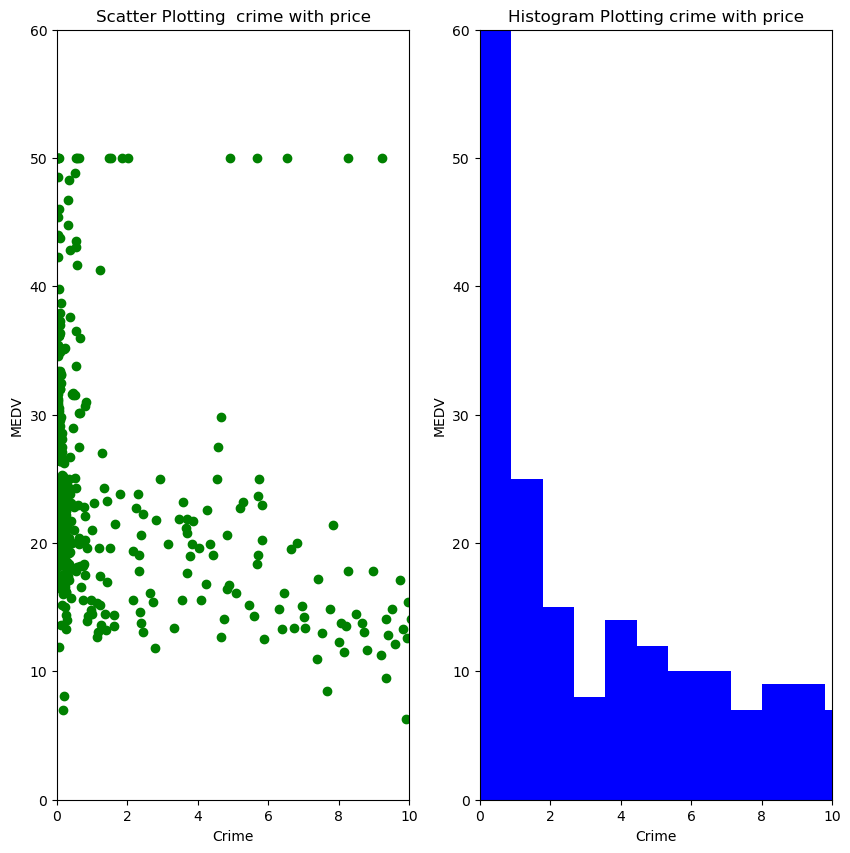

In [8]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,10))

ax[0].set_xlabel('Crime')
ax[0].set_ylabel('MEDV')
ax[0].set_title('Scatter Plotting  crime with price')
ax[0].scatter(df['crim'],df['medv'],marker='o',color='green')
ax[0].axis([0,10,0,60])

ax[1].set_title('Histogram Plotting crime with price')
ax[1].set_xlabel('Crime')
ax[1].set_ylabel('MEDV')
ax[1].hist(df['crim'],color='blue',bins=100)
ax[1].axis([0,10,0,60])
plt.show()

In [9]:
#reading the value of the zm
df['zn'].head(5)

0    18.0
1     0.0
2     0.0
3     0.0
4     0.0
Name: zn, dtype: float64

In [10]:
df['zn'].value_counts()

zn
0.0      372
20.0      21
80.0      15
22.0      10
12.5      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
95.0       4
60.0       4
21.0       4
33.0       4
55.0       3
70.0       3
34.0       3
52.5       3
35.0       3
28.0       3
75.0       3
82.5       2
85.0       2
17.5       1
100.0      1
18.0       1
Name: count, dtype: int64

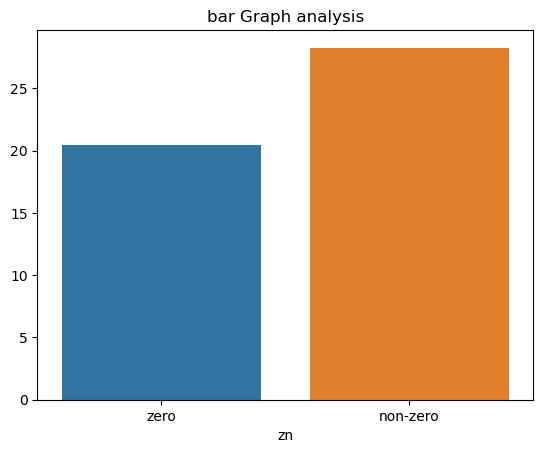

In [11]:
values=['zero','non-zero']
frequencies=[df[df['zn']==0]['medv'].mean(),
            df[df['zn']!=0]['medv'].mean()]
sns.barplot(x=values,y=frequencies)
plt.xlabel('zn')
plt.title('Mean Medv')
plt.title('bar Graph analysis')
plt.show()

In [12]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

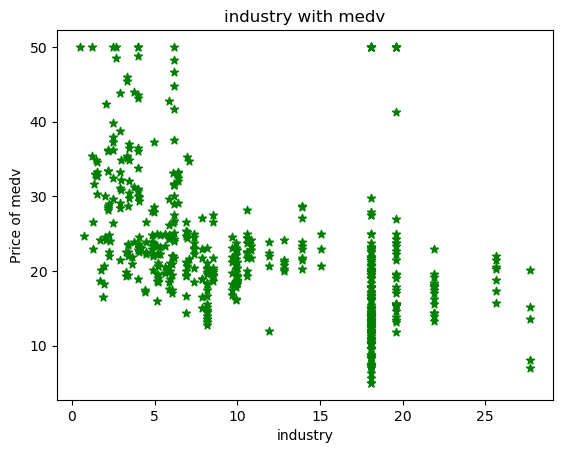

In [13]:
#indus plotting as per the medv
plt.scatter(df['indus'],df['medv'],marker='*',color='green')
plt.xlabel('industry')
plt.ylabel('Price of medv')
plt.title('industry with medv')
plt.show()

In [14]:
#chas analysis 
df['chas'].value_counts()

chas
0    471
1     35
Name: count, dtype: int64

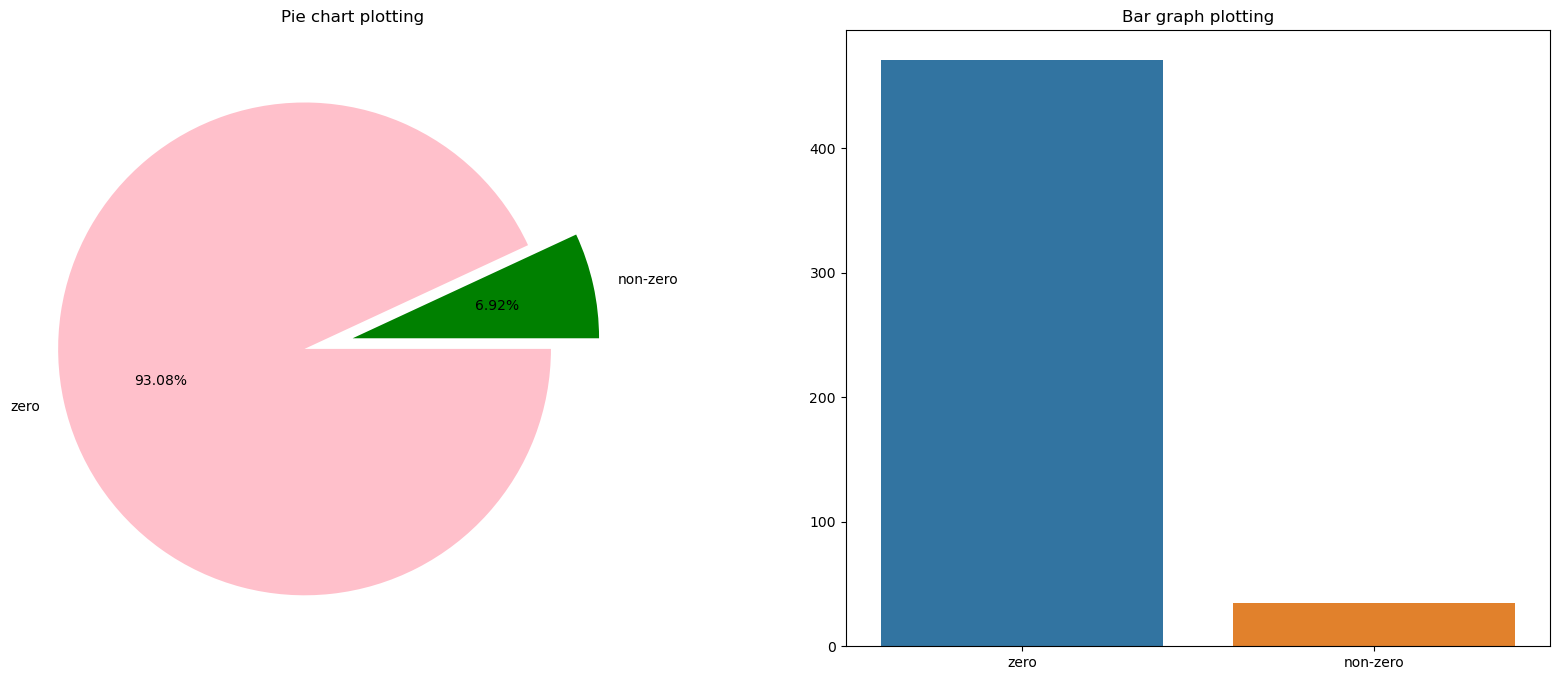

In [15]:
value=['zero','non-zero']
frequencies=[df[df['chas']==0].shape[0],df[df['chas']==1].shape[0]]
fig=plt.figure(figsize=(20,8))
fig.add_subplot(1,2,1)
plt.title('Pie chart plotting')
plt.pie(frequencies,labels=value,colors=['pink','green'],
        explode=[0.2,0],counterclock=False,autopct='%.2f%%',shadow=False)

fig.add_subplot(1,2,2)
sns.barplot(x=values,y=frequencies)
plt.title('Bar graph plotting')
plt.show()

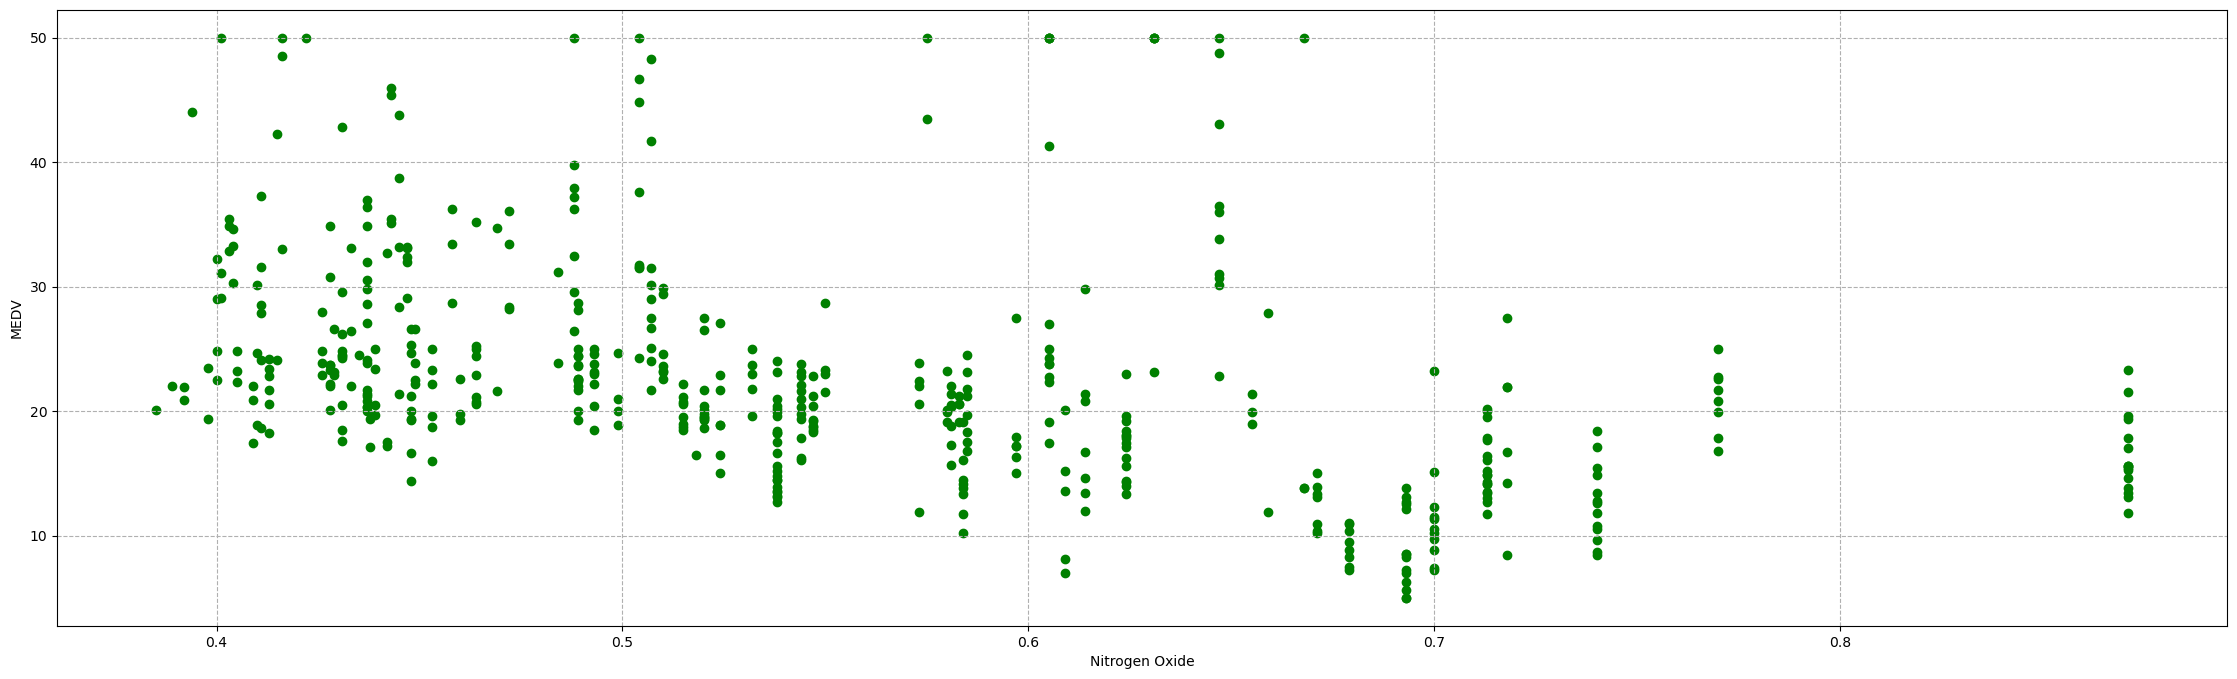

In [16]:
#nox is nitrogen oxide
plt.figure(figsize=(28,8))
plt.scatter(df['nox'],df['medv'],color='green')
plt.xlabel('Nitrogen Oxide')
plt.ylabel('MEDV')
plt.grid(ls='--')
plt.show()

In [17]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

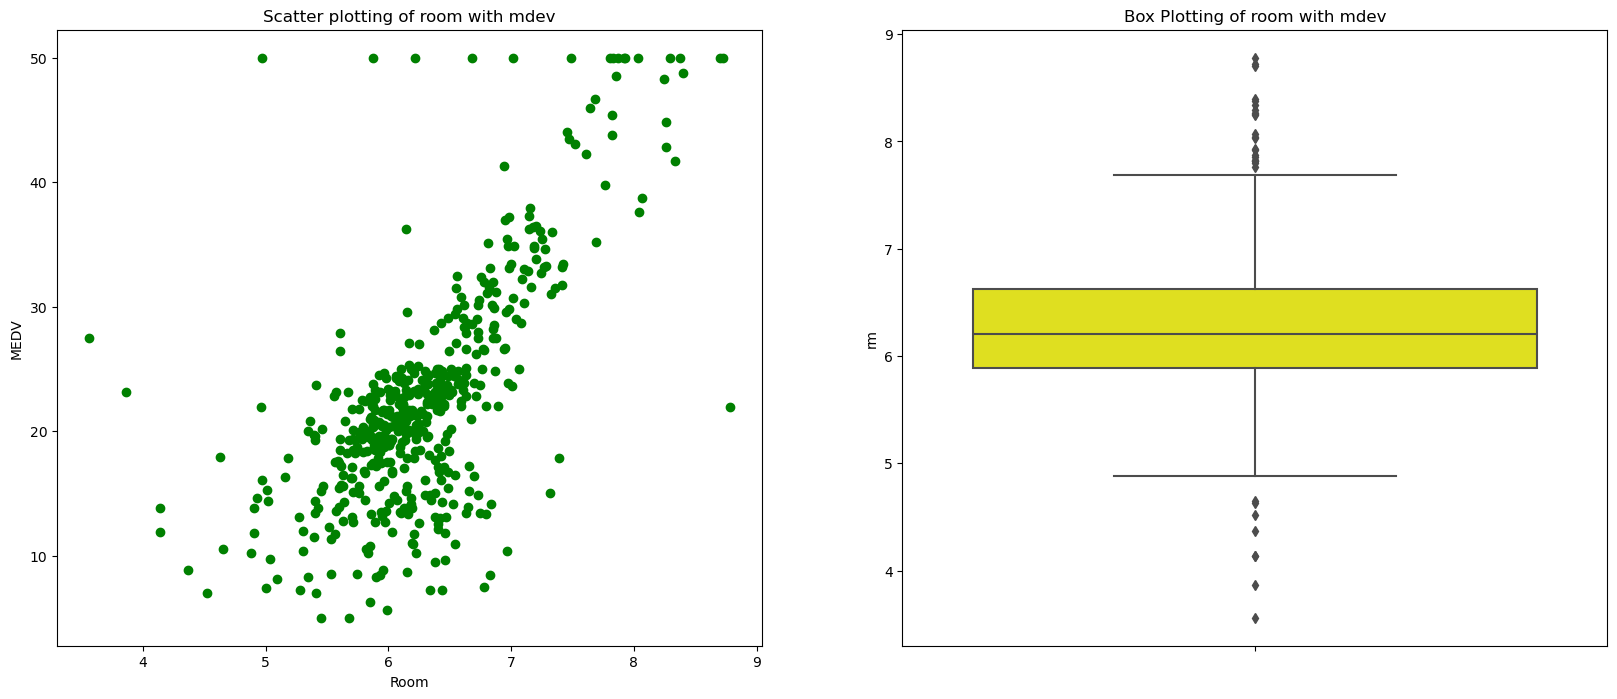

In [18]:
#plotting of rm
fig=plt.figure(figsize=(20,8))
fig.add_subplot(1,2,1)
plt.scatter(df['rm'],df['medv'],color='green')
plt.title('Scatter plotting of room with mdev')
plt.xlabel("Room")
plt.ylabel("MEDV")

fig.add_subplot(1,2,2)
sns.boxplot(y=df['rm'],color='yellow')
plt.title("Box Plotting of room with mdev")
plt.show()

In [19]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

# distribution plot

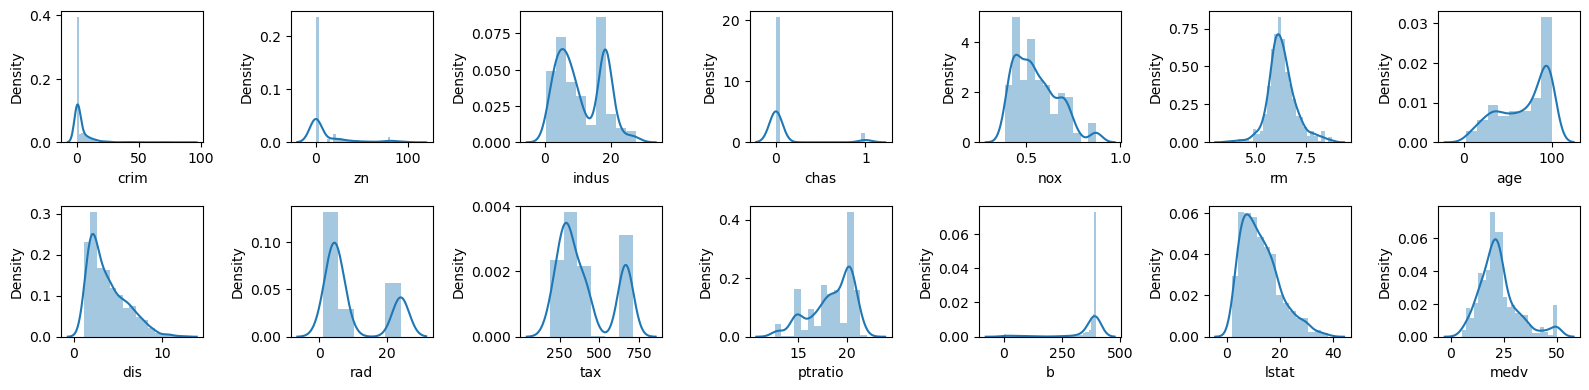

In [21]:
rows=2
cols=7
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(16,4))
col=df.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]],ax=ax[i][j])
        index+=1
plt.tight_layout()
plt.show()

# checking of the outliers of each features

In [23]:
cormat=df.corr()
cormat

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


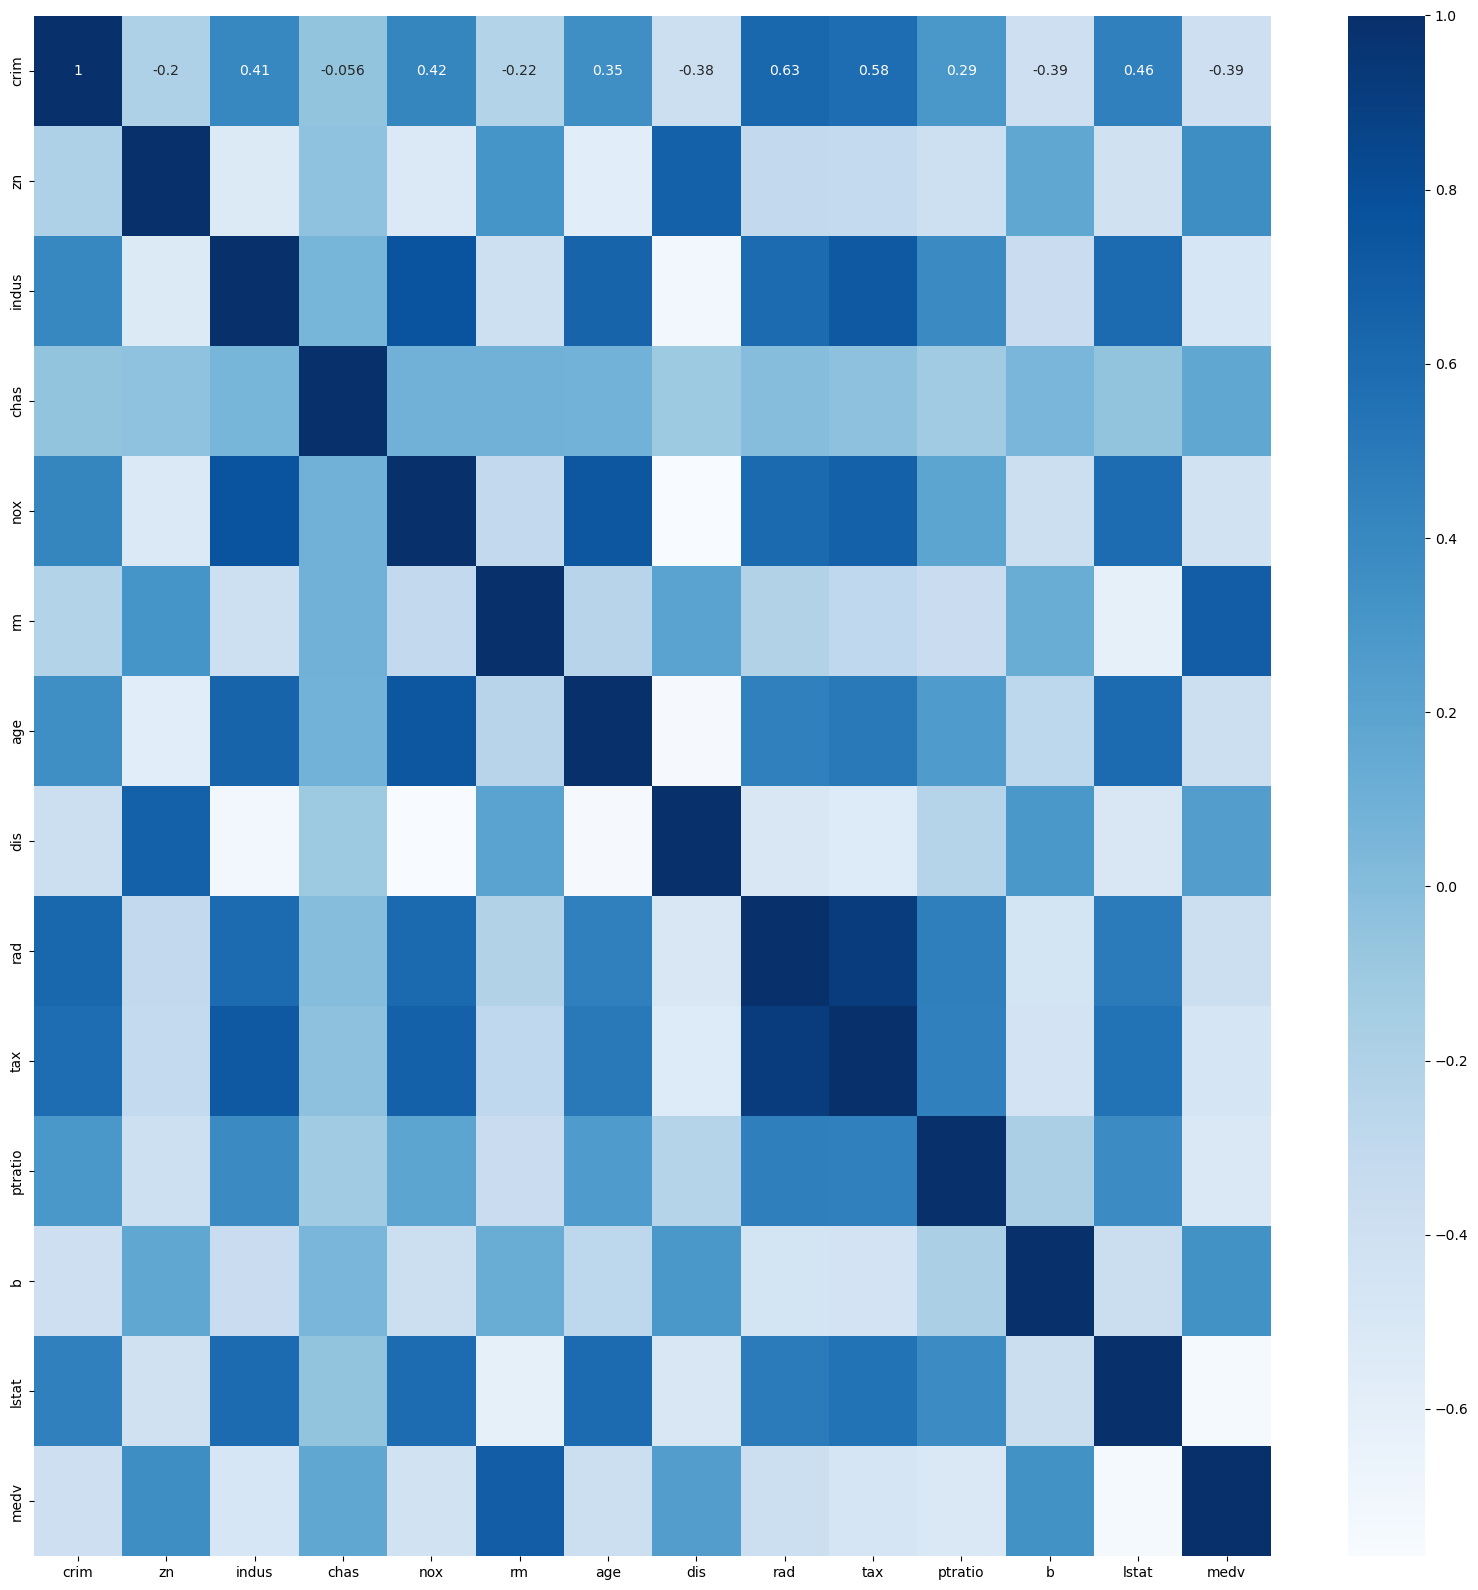

In [24]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.tight_layout()
plt.show()

In [25]:
def get_corelation_data(corrdata,threshold):
    feature=[]
    value=[]
    for i,index in enumerate (corrdata.index):
        if abs(corrdata[index])>threshold:
            feature.append(index)
            value.append(corrdata[index])
    df=pd.DataFrame(data=value,index=feature,columns=['corr_value'])
    return df

In [26]:
threshold=0.50
corr_value=get_corelation_data(cormat['medv'],threshold)
corr_value

,corr_value
rm,0.695360
ptratio,-0.507787
lstat,-0.737663
medv,1.000000


In [27]:
correlated_data=df[corr_value.index]
correlated_data.head()

,rm,ptratio,lstat,medv
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


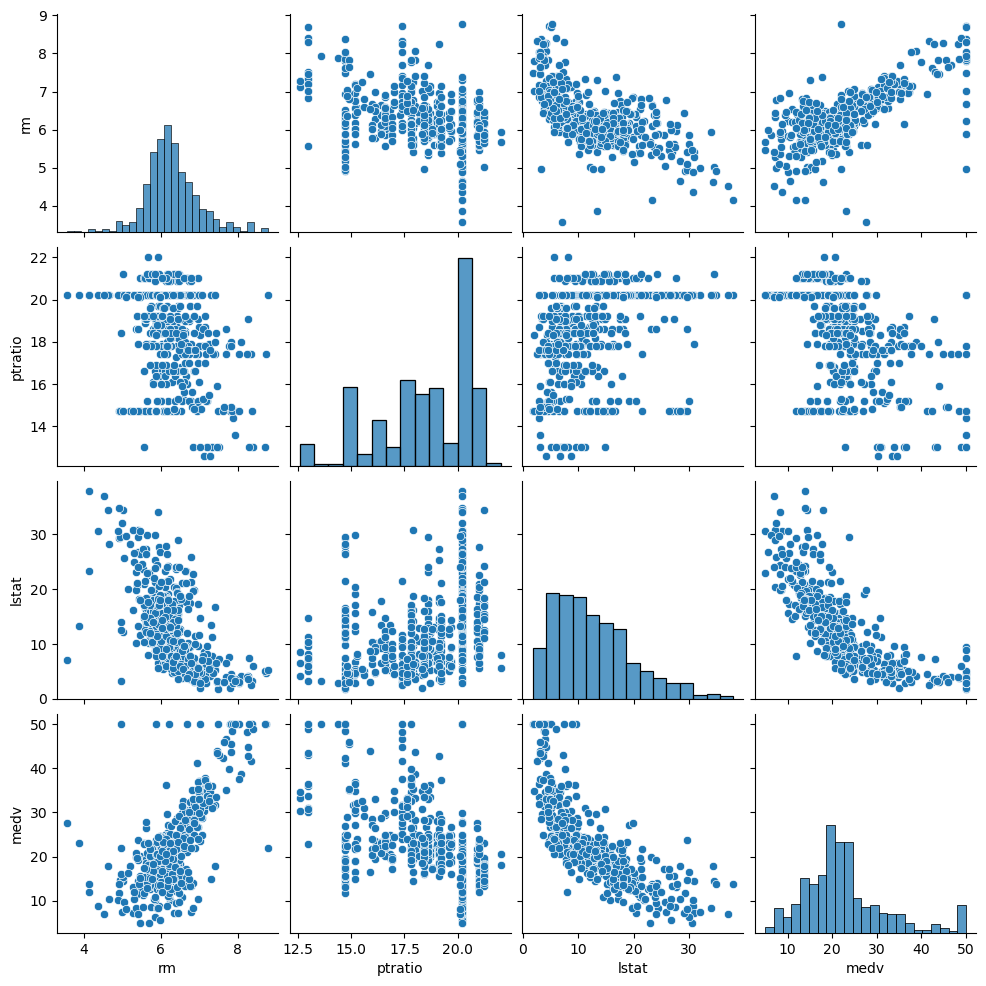

In [28]:
sns.pairplot(correlated_data)

In [29]:
x=correlated_data.drop(labels=['medv'],axis=1)
y=correlated_data['medv']

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [31]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((404, 3), (102, 3), (404,), (102,))

# 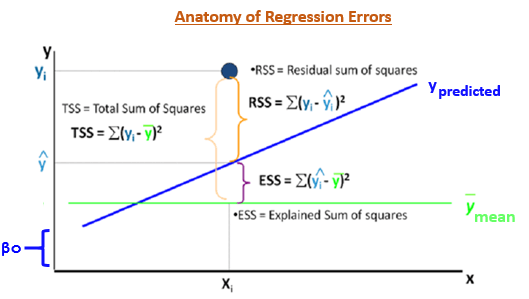

# formula for the R2score,MSE,RMSE,MAE

In [35]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [36]:
y_pred=model.predict(X_test)

In [37]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [38]:
score=r2_score(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
mse=mean_squared_error(Y_test,y_pred)
rmse=np.sqrt(mse)
print("The r2 score is",score)
print('The mean absoulte error is',mae)
print("The mean squared error is",mse)
print("The root mean squared error is",rmse)

The r2 score is 0.6302528487272827
The mean absoulte error is 3.3325380783240974
The mean squared error is 27.11495741558058
The root mean squared error is 5.207202455789536


In [39]:
import joblib
joblib.dump(model,'model_predict')

['model_predict']